In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve
import seaborn as sns

In [4]:
print("Loading Breast Cancer Wisconsin Dataset...")
data = load_breast_cancer()
X = data.data
y = data.target

print(f"Dataset loaded: {X.shape[0]} samples, {X.shape[1]} features")
print(f"Classes: {np.unique(y)} (0=Malignant, 1=Benign)")

Loading Breast Cancer Wisconsin Dataset...
Dataset loaded: 569 samples, 30 features
Classes: [0 1] (0=Malignant, 1=Benign)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Train set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# 3. Fit a Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

print("Logistic Regression model trained!")

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

Train set: 455 samples
Test set: 114 samples
Logistic Regression model trained!


In [7]:
print("\n=== MODEL EVALUATION ===")

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"\nPrecision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")



=== MODEL EVALUATION ===
Confusion Matrix:
[[41  2]
 [ 1 70]]

Precision: 0.9722
Recall: 0.9859
ROC-AUC: 0.9974



=== THRESHOLD TUNING ===
Threshold | Precision | Recall
------------------------------
     0.3 |   0.9726 | 1.0000
     0.4 |   0.9726 | 1.0000
     0.5 |   0.9722 | 0.9859
     0.6 |   0.9859 | 0.9859
     0.7 |   0.9853 | 0.9437


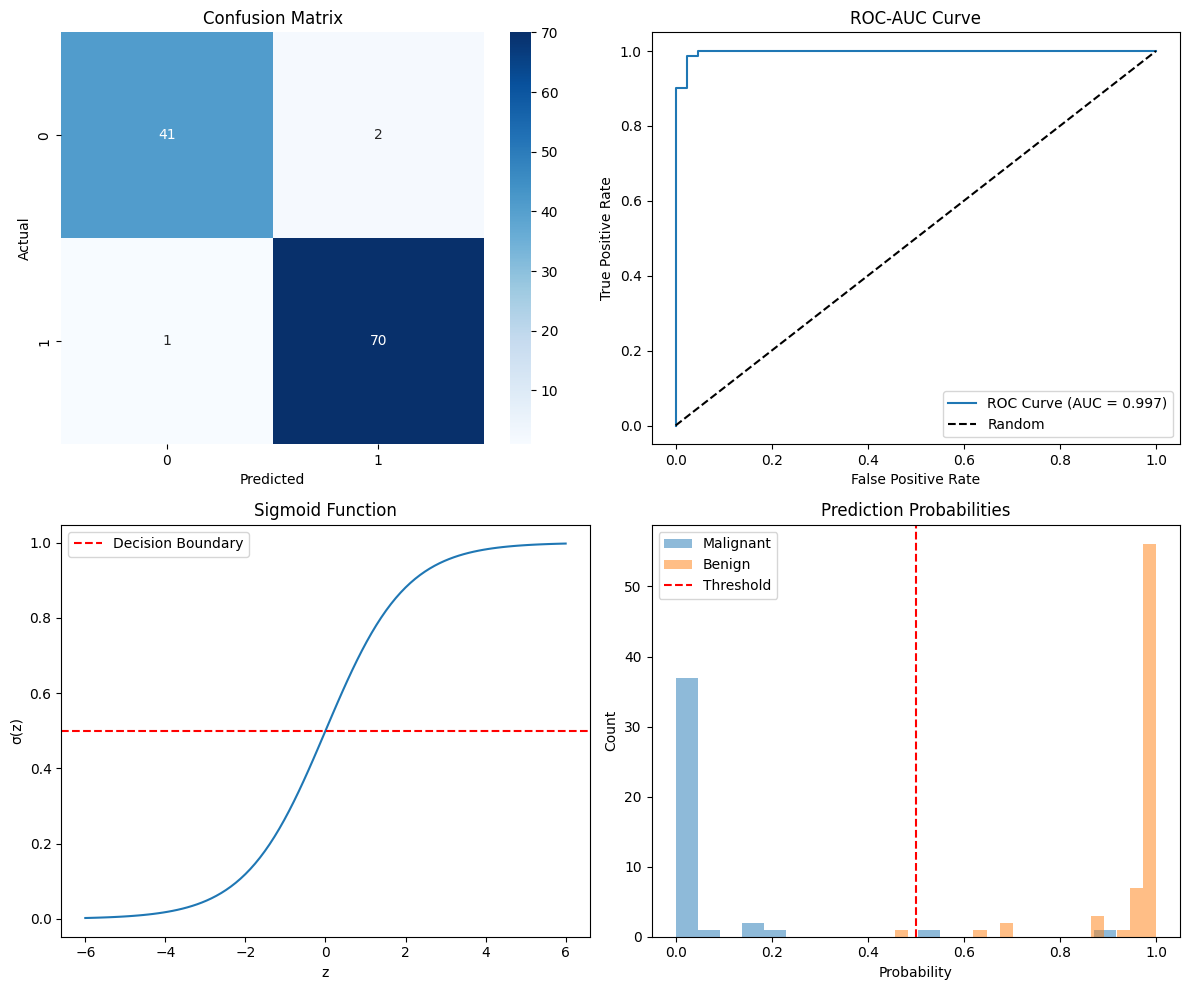


=== SIGMOID FUNCTION EXPLANATION ===
The sigmoid function σ(z) = 1 / (1 + e^(-z)) maps any real number to a value between 0 and 1.
It creates an S-shaped curve that's used to convert linear outputs to probabilities.
When z = 0, σ(z) = 0.5 (decision boundary)
As z increases, σ(z) approaches 1
As z decreases, σ(z) approaches 0


In [8]:
print("\n=== THRESHOLD TUNING ===")

thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
print("Threshold | Precision | Recall")
print("-" * 30)

for threshold in thresholds:
    y_pred_thresh = (y_pred_proba >= threshold).astype(int)
    prec = precision_score(y_test, y_pred_thresh)
    rec = recall_score(y_test, y_pred_thresh)
    print(f"{threshold:8.1f} | {prec:8.4f} | {rec:6.4f}")

# Visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))

# Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('Confusion Matrix')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
ax2.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
ax2.plot([0, 1], [0, 1], 'k--', label='Random')
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC-AUC Curve')
ax2.legend()

# Sigmoid Function
z = np.linspace(-6, 6, 100)
sigmoid = 1 / (1 + np.exp(-z))
ax3.plot(z, sigmoid)
ax3.axhline(y=0.5, color='r', linestyle='--', label='Decision Boundary')
ax3.set_title('Sigmoid Function')
ax3.set_xlabel('z')
ax3.set_ylabel('σ(z)')
ax3.legend()

# Prediction Probabilities
ax4.hist(y_pred_proba[y_test == 0], alpha=0.5, label='Malignant', bins=20)
ax4.hist(y_pred_proba[y_test == 1], alpha=0.5, label='Benign', bins=20)
ax4.axvline(x=0.5, color='r', linestyle='--', label='Threshold')
ax4.set_title('Prediction Probabilities')
ax4.set_xlabel('Probability')
ax4.set_ylabel('Count')
ax4.legend()

plt.tight_layout()
plt.show()

print("\n=== SIGMOID FUNCTION EXPLANATION ===")
print("The sigmoid function σ(z) = 1 / (1 + e^(-z)) maps any real number to a value between 0 and 1.")
print("It creates an S-shaped curve that's used to convert linear outputs to probabilities.")
print("When z = 0, σ(z) = 0.5 (decision boundary)")
print("As z increases, σ(z) approaches 1")
print("As z decreases, σ(z) approaches 0")
